# Introduction to Neural Networks

## Import packages

In [55]:
from keras.datasets import mnist                                                            #Download Data
from keras.preprocessing.image import load_img, array_to_img                                #Used For Preprocessing
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense                                                              #Fully Connected Layer

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data

In [56]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [57]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Understanding the image data format

In [58]:
X_train[0].shape

(28, 28)

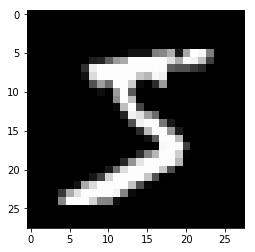

In [59]:
plt.imshow(X_train[0], cmap='gray')

In [60]:
y_train[0]

5

## Preprocessing the image data

In [61]:
image_height, image_width = 28,28

In [62]:
X_train = X_train.reshape(60000, image_height*image_width)
X_test = X_test.reshape(10000, image_height*image_width)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [63]:
print(X_train[0])                                                                                       #check_the max is 225 
X_train = X_train.astype('float32')                                                                     #To avoid problems while deviding by 225
X_test = X_test.astype('float32')

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [64]:
X_train /= 255.0                                                                                            #Scale the images
X_test /= 255.0
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [65]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [66]:
y_train[0]

5

In [67]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [68]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Build a model

In [69]:
model = Sequential()

In [70]:
model.add(Dense(512, activation='relu', input_shape=(784, )))                               #Input layer with 28*28 as input
model.add(Dense(512, activation='relu'))                                                   #Second Layer and the input can be dedicted no need to specify it
model.add(Dense(10, activation='softmax'))                                                   

## Compile the model

In [71]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [72]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


Calculate param #

In [73]:
28*28*512+512

401920

In [74]:
512*512+512

262656

In [75]:
512*10+10

5130

## Train the model

In [76]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 29s - loss: 0.1844 - acc: 0.9443 - val_loss: 0.1379 - val_acc: 0.9551
Epoch 2/20
60000/60000 [==============================] - 27s - loss: 0.0816 - acc: 0.9740 - val_loss: 0.0810 - val_acc: 0.9754
Epoch 3/20
60000/60000 [==============================] - 29s - loss: 0.0566 - acc: 0.9823 - val_loss: 0.0891 - val_acc: 0.9726
Epoch 4/20
60000/60000 [==============================] - 29s - loss: 0.0426 - acc: 0.9861 - val_loss: 0.0827 - val_acc: 0.9774
Epoch 5/20
60000/60000 [==============================] - 28s - loss: 0.0343 - acc: 0.9894 - val_loss: 0.0758 - val_acc: 0.9793
Epoch 6/20
60000/60000 [==============================] - 27s - loss: 0.0288 - acc: 0.9909 - val_loss: 0.0880 - val_acc: 0.9810
Epoch 7/20
60000/60000 [==============================] - 28s - loss: 0.0252 - acc: 0.9920 - val_loss: 0.0823 - val_acc: 0.9814
Epoch 8/20
60000/60000 [==============================

## What is the accuracy of the model?

### Plot the accuracy of the training model

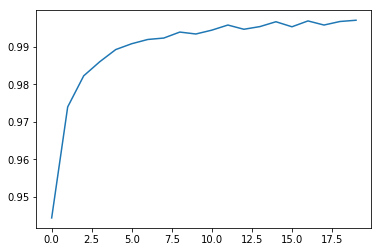

In [77]:
plt.plot(history.history['acc'])

### Plot the accuracy of training and validation set

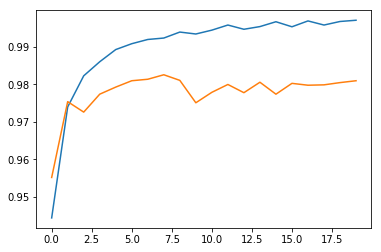

In [78]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

### Accuracy of training and validation with loss

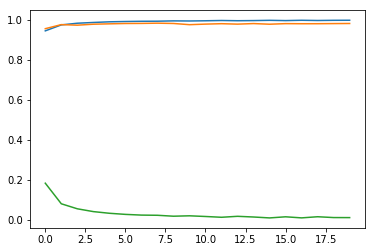

In [79]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])

## Run a prediction

In [80]:
score = model.evaluate(X_test, y_test)

 9600/10000 [===========================>..] - ETA: 0s

In [81]:
score

[0.13245663974386265, 0.981]

## Experiment further
- What results do you get with a model with more than 2 hidden layers and more/less neurons
- What results do you get when trying to use another activation function?

In [84]:
model2 = Sequential()
model2.add(Dense(512, activation='relu', input_shape=(784, )))                           
model2.add(Dense(512, activation='tanh'))                                                
model2.add(Dense(128, activation='tanh'))
model2.add(Dense(10, activation='softmax')) 
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_19 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_20 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total params: 731,530
Trainable params: 731,530
Non-trainable params: 0
_________________________________________________________________


In [85]:
history2 = model2.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 31s - loss: 0.1881 - acc: 0.9428 - val_loss: 0.1107 - val_acc: 0.9654
Epoch 2/20
60000/60000 [==============================] - 31s - loss: 0.0911 - acc: 0.9720 - val_loss: 0.0906 - val_acc: 0.9737
Epoch 3/20
60000/60000 [==============================] - 31s - loss: 0.0683 - acc: 0.9786 - val_loss: 0.0881 - val_acc: 0.9758
Epoch 4/20
60000/60000 [==============================] - 31s - loss: 0.0537 - acc: 0.9837 - val_loss: 0.0908 - val_acc: 0.9751
Epoch 5/20
60000/60000 [==============================] - 31s - loss: 0.0416 - acc: 0.9870 - val_loss: 0.0869 - val_acc: 0.9759
Epoch 6/20
60000/60000 [==============================] - 31s - loss: 0.0367 - acc: 0.9885 - val_loss: 0.0739 - val_acc: 0.9799
Epoch 7/20
60000/60000 [==============================] - 31s - loss: 0.0298 - acc: 0.9903 - val_loss: 0.0937 - val_acc: 0.9759
Epoch 8/20
60000/60000 [==============================

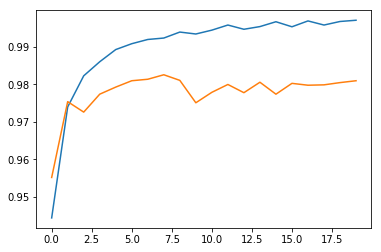

In [88]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

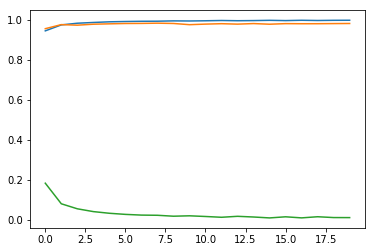

In [89]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])

In [90]:
score2 = model2.evaluate(X_test, y_test)
score2

 9920/10000 [============================>.] - ETA: 0s

[0.09746008698121732, 0.9802]

# Convolution Neural Network

## Import the libraries

In [91]:
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

## Load the data

In [92]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [93]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Pre-processing

In [97]:
batch_size = 128
num_classes = 10
epochs = 3

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test, num_classes)

In [98]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


## Use the model

In [99]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3,3),input_shape=(28,28,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(32, kernel_size=(3,3),padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dense(10,activation='softmax'))
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(cnn.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                100416    
_________________________________________________________________
dense_23 (Dense)             (None, 10)                650       
Total para

In [100]:
history_cnn = cnn.fit(X_train,y_train,epochs=20,verbose=1,validation_data=(X_train,y_train))

Train on 60000 samples, validate on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 110s - loss: 2.3015 - acc: 0.1114 - val_loss: 2.3013 - val_acc: 0.1124
Epoch 2/20
60000/60000 [==============================] - 117s - loss: 2.3014 - acc: 0.1124 - val_loss: 2.3012 - val_acc: 0.1124
Epoch 3/20
60000/60000 [==============================] - 100s - loss: 2.3014 - acc: 0.1124 - val_loss: 2.3012 - val_acc: 0.1124
Epoch 4/20
60000/60000 [==============================] - 108s - loss: 2.3014 - acc: 0.1124 - val_loss: 2.3012 - val_acc: 0.1124
Epoch 5/20
60000/60000 [==============================] - 105s - loss: 2.3014 - acc: 0.1124 - val_loss: 2.3012 - val_acc: 0.1124
Epoch 6/20
60000/60000 [==============================] - 101s - loss: 2.3014 - acc: 0.1124 - val_loss: 2.3012 - val_acc: 0.1124
Epoch 7/20
60000/60000 [==============================] - 98s - loss: 2.3014 - acc: 0.1124 - val_loss: 2.3012 - val_acc: 0.1124
Epoch 8/20
60000/60000 [========================

Recall that when using neural networks we got good accuracy.

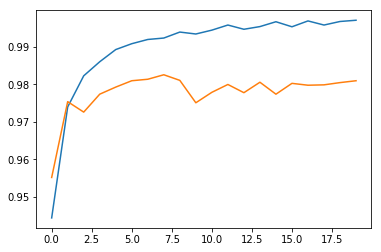

In [101]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

Comparing this to using CNNs - the performance is far superior.

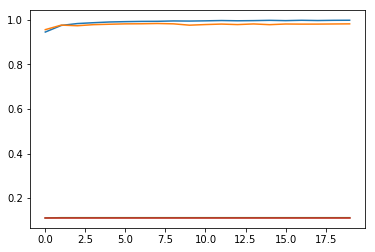

In [102]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history_cnn.history['acc'])
plt.plot(history_cnn.history['val_acc'])